In [40]:
import pandas as pd
import pymongo
import json
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

In [41]:
#Get Connection string from JSON file
# Opening JSON file
json_file = open('C:\\Users\\stuar\\Downloads\\MongoDBConnection.json')
  
#Grab connection string
mongo_connection_string = json.load(json_file)['mongodb']

# Closing file
json_file.close() 

In [42]:
#Connect
da320_database = pymongo.MongoClient(mongo_connection_string)['metacritic']
 
# Access collection of the database
metacritic_data = da320_database['movies']

#Establish the connection
metacritic = pd.DataFrame(metacritic_data.find())

In [43]:
metacritic.release_date = pd.to_datetime(metacritic.release_date)
metacritic['year'] = metacritic.release_date.dt.year
metacritic['month'] = metacritic.release_date.dt.month
metacritic.metascore = pd.to_numeric(metacritic.metascore)
metacritic.head()


,_id,title,release_date,description,metascore,image_url,year,month
0,6368517f58a1349c757e7be3,"Crouching Tiger, Hidden Dragon",2000-12-08,"In 19th century China, a magical sword given b...",94,https://static.metacritic.com/images/products/...,2000,12
1,6368517f58a1349c757e7be4,Yi Yi,2000-10-06,This film portrays life through portraits of t...,93,https://static.metacritic.com/images/products/...,2000,10
2,6368517f58a1349c757e7be5,Beau Travail,2000-03-31,The soldiers of a small French Foreign Legion ...,91,https://static.metacritic.com/images/products/...,2000,3
3,6368517f58a1349c757e7be6,Almost Famous,2000-09-13,"In the 1970's, a high school boy (Fugit) is gi...",90,https://static.metacritic.com/images/products/...,2000,9
4,6368517f58a1349c757e7be7,Chicken Run,2000-06-21,A claymation spoof of classic prison-camp flic...,88,https://static.metacritic.com/images/products/...,2000,6


## Average Movie Metascore by Year

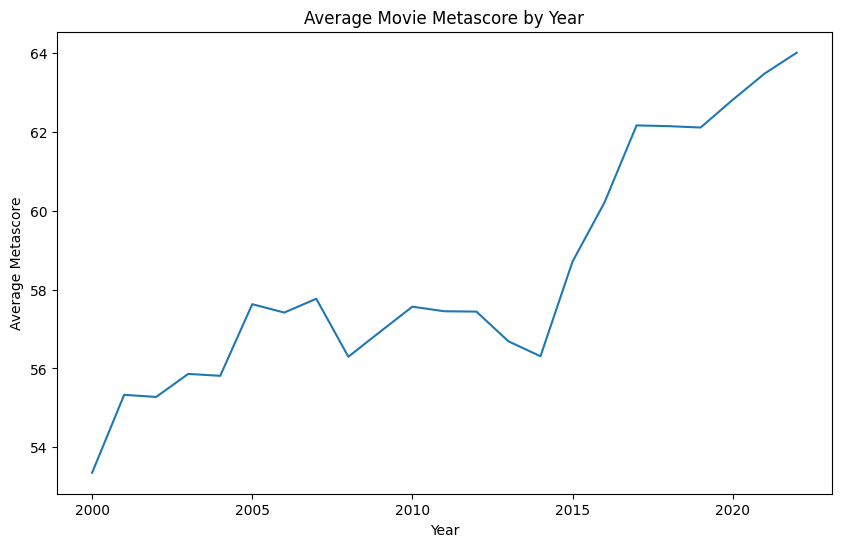

In [44]:
#Group by year, and get average score
metacritic_GroupByYear = metacritic.groupby(['year']).mean(['metascore'])

#make fig big
fig = plt.figure(figsize=(10, 6))

#Label axes
ax1 = fig.add_subplot()
ax1.set_ylabel('Average Metascore')
ax1.set_xlabel('Year')

# displaying the title
plt.title("Average Movie Metascore by Year")

#Plot average runtime against year
plt.plot(metacritic_GroupByYear['metascore'])

The above is an interesting graph. It raising some questions
- Is movie quality is increasing?
- Are critics are being less critical?
- When were these movies reviewed? (Were they reviewed at the time they came out, or more recently?)
- Is the age of the reviewer going to impact their impression of the movie based on the period in which the movie was produced?

Text(0, 0.5, 'Average Movie Runtime')

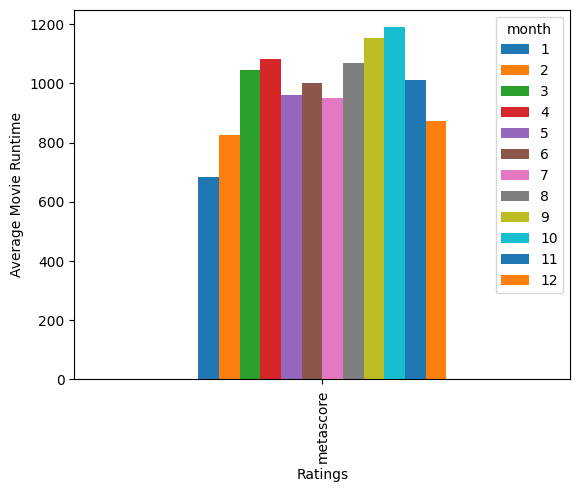

<Figure size 1000x600 with 0 Axes>

In [59]:
df_pivot = pd.pivot_table(metacritic, values='metascore', columns='month',
               aggfunc='count')


# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig = plt.figure(figsize=(10, 6))
# Change the axes labels
ax.set_xlabel("Ratings")
ax.set_ylabel("Average Movie Runtime")

